# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.251761e+01     8.260768e+00
 * time: 0.00442814826965332
     1     2.878749e+01     4.417874e+00
 * time: 0.013276100158691406
     2     2.058722e+01     4.750365e+00
 * time: 0.03360795974731445
     3     1.297455e+01     1.975465e+00
 * time: 0.05591607093811035
     4     1.229430e+01     3.115654e+00
 * time: 0.0713810920715332
     5     1.223842e+01     2.402660e+00
 * time: 0.08732414245605469
     6     1.123247e+01     2.168542e+00
 * time: 0.1568589210510254
     7     1.045756e+01     1.396406e+00
 * time: 0.17443013191223145
     8     9.839886e+00     1.254630e+00
 * time: 0.19118499755859375
     9     9.558010e+00     7.061351e-01
 * time: 0.20686006546020508
    10     9.422247e+00     6.274731e-01
 * time: 0.22274494171142578
    11     9.411078e+00     8.221123e-01
 * time: 0.23533105850219727
    12     9.348140e+00     8.504156e-01
 * time: 0.24711394309997559
    13     9.297750e+00     5.402371e-01
 * time: 

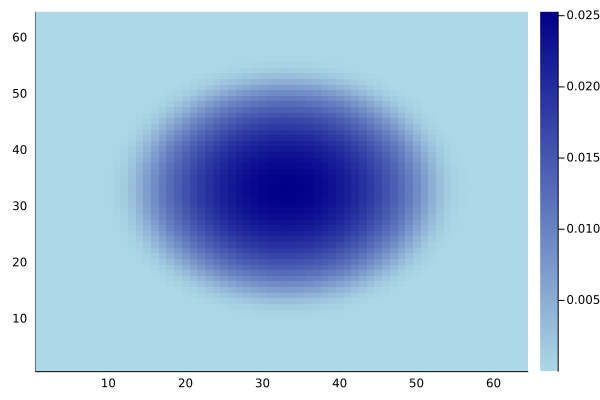

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)